# Notebook Content 


- [1.0- LLM ](#1.0)
    - [1.1- Model Description](#1.1)
    - [1.2- Import Requirements](#1.2)
    - [1.3- Use Model](#1.3)
    - [1.4- Evaluate Model](#1.4)


# 1.0- LLM

## 1.1- Model Description

TrOCR model fine-tuned on the IAM dataset. It was introduced in the paper TrOCR: Transformer-based Optical Character Recognition with Pre-trained Models by Li et al. and first released in this repository.

The TrOCR model is an encoder-decoder model, consisting of an image Transformer as encoder, and a text Transformer as decoder. The image encoder was initialized from the weights of DeiT, while the text decoder was initialized from the weights of UniLM.

Images are presented to the model as a sequence of fixed-size patches (resolution 16x16), which are linearly embedded. One also adds absolute position embeddings before feeding the sequence to the layers of the Transformer encoder. Next, the Transformer text decoder autoregressively generates tokens.
[Model Linke](https://huggingface.co/microsoft/trocr-small-handwritten)

## 1.2- Import Requirements

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import requests
import matplotlib.pyplot as plt 
from transformers import TrOCRProcessor , VisionEncoderDecoderModel 
from PIL import Image



## 1.3- Use Model

In [2]:
# Load data from IAM database
URL        = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
model_name = 'microsoft/trocr-small-handwritten'
image= Image.open(requests.get(URL , stream=True).raw).convert('RGB')

processor = TrOCRProcessor.from_pretrained(model_name)
model     = VisionEncoderDecoderModel.from_pretrained(model_name)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Test Model

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Model Result :
industry
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Handwriting Image :
AxesImage(size=(76, 248))


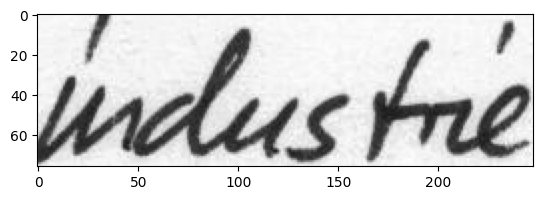

In [3]:
# let's Generate text from pretrained LLM

Inputs  = processor(images=image , return_tensors='pt').pixel_values 
Generate= model.generate(Inputs)
Outputs = processor.batch_decode(Generate  , skip_special_tokens=True)[0]
## show the result
dash_line = ' '.join('-' for _ in range(100))

print(f'Model Result :\n{Outputs}')
print(dash_line)
print(f"Handwriting Image :\n{plt.imshow(image)}")


## Load Dataset

In [4]:
# Load data 
train_data = pd.read_csv('/kaggle/input/handwriting-recognition/written_name_train_v2.csv')
train_data.head()

FILENAME   IDENTITY
0  TRAIN_00001.jpg  BALTHAZAR
1  TRAIN_00002.jpg      SIMON
2  TRAIN_00003.jpg      BENES
3  TRAIN_00004.jpg    LA LOVE
4  TRAIN_00005.jpg     DAPHNE

In [5]:
train_data.describe()

FILENAME IDENTITY
count            330961   330396
unique           330961   100539
top     TRAIN_00001.jpg   THOMAS
freq                  1     1825

In [6]:
## split the data into names and image file name
image_file_name  = train_data['FILENAME'].to_list()
image_names = train_data['IDENTITY'].to_list()

In [7]:
print(image_names[:5])

['BALTHAZAR', 'SIMON', 'BENES', 'LA LOVE', 'DAPHNE']


### Let's Evaluate model prediction with first 500 images to show the results....

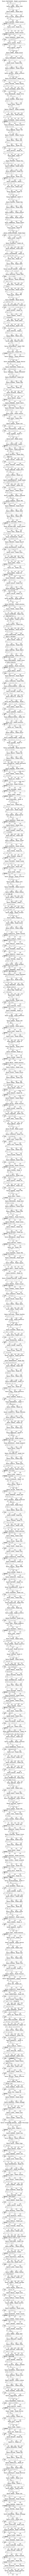

In [8]:
train_path  = '/kaggle/input/handwriting-recognition/train_v2/train'


fig , ax = plt.subplots(500,1 ,figsize=(4,500) )


for i in range(500):
    
    name       = image_file_name[i]
    image_path = f'{train_path}/{name}'
    image      = Image.open(image_path)
    
    Inputs  = processor(images=image , return_tensors='pt').pixel_values 
    Generate= model.generate(Inputs , max_new_tokens=1)
    Outputs = processor.batch_decode(Generate  , skip_special_tokens=True)[0]
    acual_name = image_names[i]
    plt.subplots_adjust(hspace=1.5)
    ax[i].imshow(image)
    ax[i].set_title(f'Name: {acual_name} ,  Model: {Outputs}')